In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
drivers_df = pd.read_csv('../../Uber-DS-Challenge/data/input/ds_challenge_v2_1_data.csv')
drivers_df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [4]:
num_drivers = len(drivers_df)
print("Total number of drivers:", num_drivers)

pct_incomplete = np.mean(pd.isnull(drivers_df.first_completed_date))
pct_complete = 1.0 - pct_incomplete

print("Fraction of drivers that took a first trip: %.4f" % pct_complete)

car_makers = drivers_df.vehicle_make.unique()
car_models = drivers_df.vehicle_model.unique()
signup = drivers_df.signup_channel.unique()

print("Number of different car makers %d" % len(car_makers))
print("Number of different car models %d" % len(car_models))
print("Type of sign up methods", signup)

Total number of drivers: 54681
Fraction of drivers that took a first trip: 0.1122
Number of different car makers 47
Number of different car models 369
Type of sign up methods ['Paid' 'Organic' 'Referral']


In [5]:
features = drivers_df.columns[1:-1]
print(features)

Index(['city_name', 'signup_os', 'signup_channel', 'signup_date', 'bgc_date',
       'vehicle_added_date', 'vehicle_make', 'vehicle_model', 'vehicle_year'],
      dtype='object')


In [6]:
for feature in features:
    n_missing = np.sum(pd.isnull(drivers_df.loc[:, feature]))
    pct_missing = np.mean(pd.isnull(drivers_df.loc[:, feature]))
    print(feature, n_missing, pct_missing)

city_name 0 0.0
signup_os 6857 0.125400047549
signup_channel 0 0.0
signup_date 0 0.0
bgc_date 21785 0.398401638595
vehicle_added_date 41547 0.759806879903
vehicle_make 41458 0.758179257878
vehicle_model 41458 0.758179257878
vehicle_year 41458 0.758179257878


In [7]:
null_completed_date = pd.isnull(drivers_df.first_completed_date)
not_completed_df = drivers_df.loc[null_completed_date]
completed_df = drivers_df.loc[~null_completed_date]

not_completed_df.vehicle_make.value_counts()

Toyota           1684
Honda             985
Nissan            749
Ford              427
Chevrolet         407
Hyundai           389
Kia               330
Volkswagen        283
Dodge             233
Mercedes-Benz     196
BMW               192
Lexus             174
Mazda             163
Subaru            128
Chrysler          124
Jeep              114
Acura             101
Infiniti           90
Scion              85
Audi               83
Mitsubishi         76
Cadillac           50
GMC                47
Volvo              42
Lincoln            37
Buick              24
Pontiac            22
Land Rover         16
Saturn             16
Mini               11
Tesla               9
Porsche             8
Jaguar              8
Fiat                7
Autobot             7
Suzuki              6
Bike                5
Hummer              5
Saab                4
Mercury             4
Bicycle             4
Bentley             2
Maserati            1
Walker              1
Isuzu               1
Name: vehi

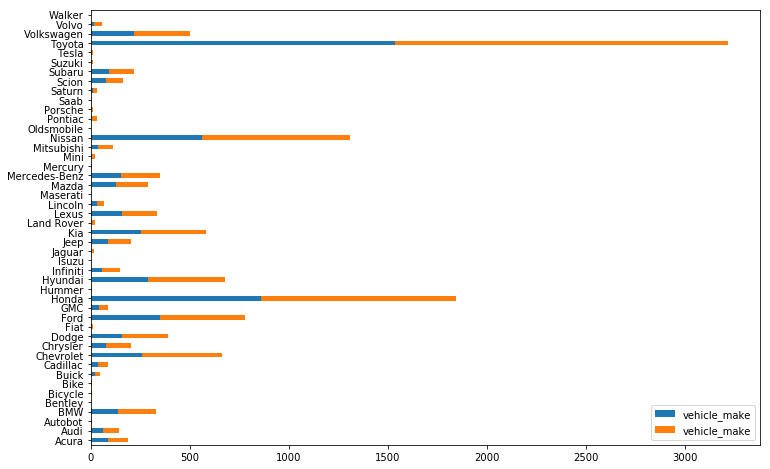

In [8]:
pd.concat((completed_df.vehicle_make.value_counts(), not_completed_df.vehicle_make.value_counts()), axis=1).plot(kind='barh', stacked=True, figsize=(12, 8))

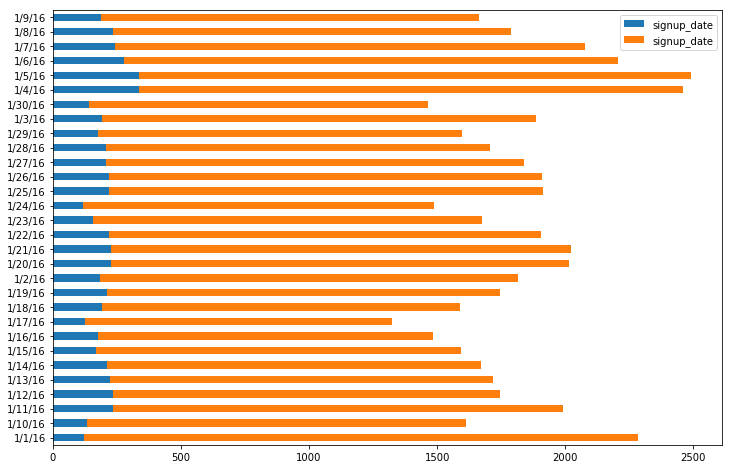

In [9]:
pd.concat((completed_df.signup_date.value_counts(), not_completed_df.signup_date.value_counts()), axis=1).plot(kind='barh', stacked=True, figsize=(12, 8))

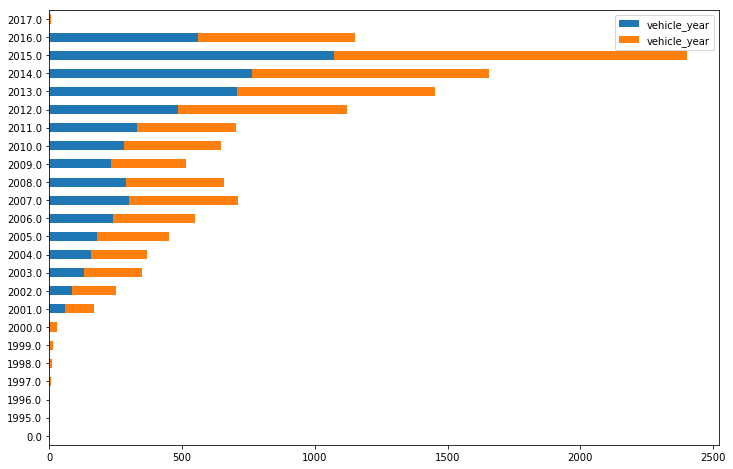

In [10]:
pd.concat((completed_df.vehicle_year.value_counts(), not_completed_df.vehicle_year.value_counts()), axis=1).plot(kind='barh', stacked=True, figsize=(12, 8))

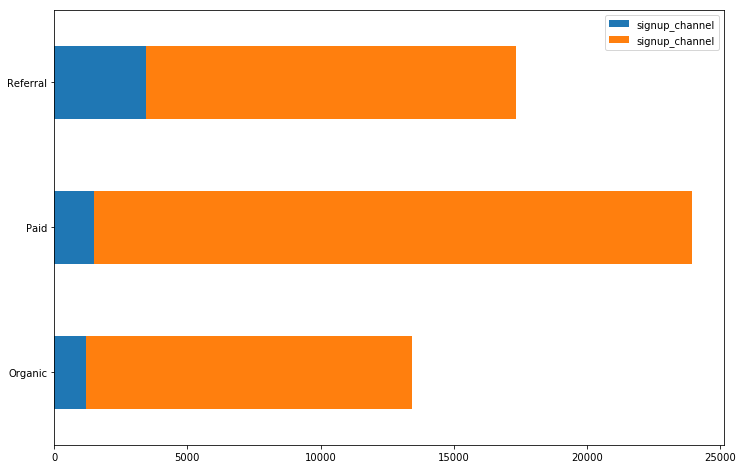

In [12]:
pd.concat((completed_df.signup_channel.value_counts(), not_completed_df.signup_channel.value_counts()), axis=1).plot(kind='barh', stacked=True, figsize=(12, 8))

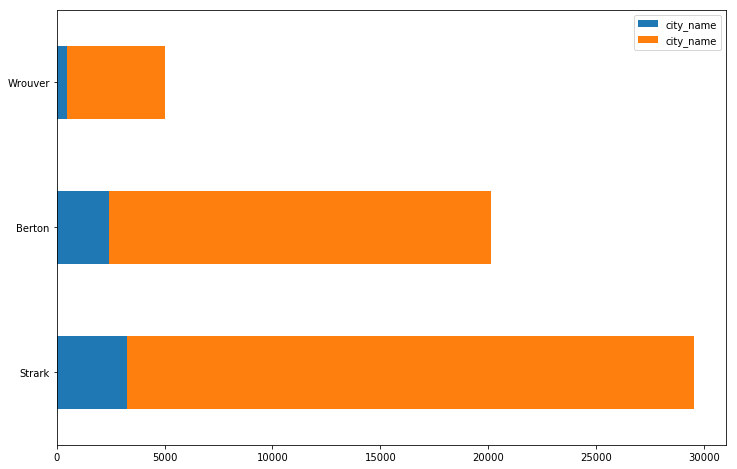

In [166]:
pd.concat((completed_df.city_name.value_counts(), not_completed_df.city_name.value_counts()), axis=1).plot(kind='barh', stacked=True, figsize=(12, 8))

In [307]:
drivers_df.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'],
      dtype='object')

In [15]:
pd.get_dummies(drivers_df, columns=["city_name", "signup_os", "vehicle_model"]).head()

,id,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_year,first_completed_date,city_name_Berton,city_name_Strark,...,vehicle_model_ZDX,vehicle_model_Zephyr,vehicle_model_e-Golf,vehicle_model_i3,vehicle_model_iA,vehicle_model_iM,vehicle_model_tC,vehicle_model_xA,vehicle_model_xB,vehicle_model_xD
0,1,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Referral,1/29/16,2/3/16,2/3/16,Toyota,2016.0,2/3/16,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Referral,1/10/16,1/25/16,1/26/16,Hyundai,2016.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


In [308]:
drivers_df.city_name = drivers_df.city_name.astype('category').cat.codes
drivers_df.signup_os = drivers_df.signup_os.astype('category').cat.codes
drivers_df.signup_date = drivers_df.signup_date.astype('category').cat.codes
drivers_df.signup_channel = drivers_df.signup_channel.astype('category').cat.codes
drivers_df.bgc_date = drivers_df.bgc_date.astype('category').cat.codes

drivers_df.vehicle_added_date = drivers_df.signup_channel.astype('category').cat.codes
drivers_df.vehicle_make = drivers_df.vehicle_make.astype('category').cat.codes
drivers_df.vehicle_model = drivers_df.vehicle_model.astype('category').cat.codes
drivers_df.vehicle_year = drivers_df.vehicle_year.astype('category').cat.codes
drivers_df['signed_up'] = (pd.isnull(drivers_df.first_completed_date) == False).astype(int)

In [316]:
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [310]:
len(drivers_df.dropna())

6137

In [314]:
X = drivers_df.adrop(['id', 'first_completed_date', 'signed_up'], axis=1).as_matrix()
y = drivers_df.signed_up

print(X.shape, y.shape)

(54681, 9) (54681,)


In [325]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/home/olivier/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [317]:
print(np.mean(y == 1))

0.11223276823759624


In [244]:
split = int(len(y) * 0.7)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

print(len(X_train), len(X_test))

38276 16405


In [326]:
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print("Mean AUC across 5 folds", np.mean(scores))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Mean accuracy across 5 folds", np.mean(scores))

Mean AUC across 5 folds 0.9149513251977478
Mean accuracy across 5 folds 0.8925951875173481


In [327]:
clf.fit(X, y)

# The estimated coefficients will all be around 1:
print(clf.coef_)

# Those values, however, will show that the second parameter
# is more influential
print(np.std(X, 0)*clf.coef_)

[[-0.10086543  0.25048062  0.12310498  0.09952932 -0.31457767  0.12310498
   0.23110323  0.14547668  1.39337845]]
[[-0.10086543  0.25048062  0.12310498  0.09952932 -0.31457767  0.12310498
   0.23110323  0.14547668  1.39337845]]


In [328]:
features = drivers_df.columns[1:-2].values

importances = clf.coef_[0]
fi = {}
for (feature_name, importance) in zip(features, importances):
    fi[feature_name] = importance
    
for key, value in sorted(fi.items(), key=lambda x: x[1], reverse=True):
    print(key, value)

vehicle_year 1.3933784471992405
signup_os 0.2504806178973195
vehicle_make 0.23110323059953078
vehicle_model 0.14547668232579783
vehicle_added_date 0.12310497642663645
signup_channel 0.12310497642663645
signup_date 0.0995293152875014
city_name -0.10086543052739189
bgc_date -0.31457767079136606


In [329]:
clf = LinearSVC()
scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print("Mean AUC across 5 folds", np.mean(scores))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Mean accuracy across 5 folds", np.mean(scores))

Mean AUC across 5 folds 0.9148938212478266
Mean accuracy across 5 folds 0.8941313898369577


In [269]:
drivers_df.columns[1:-2].values

array(['city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year'], dtype=object)

In [330]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print("Mean AUC across 5 folds", np.mean(scores))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Mean accuracy across 5 folds", np.mean(scores))

Mean AUC across 5 folds 0.9273275523241992
Mean accuracy across 5 folds 0.9118890364702121


In [281]:
features = drivers_df.columns[1:-2].values

importances = clf.feature_importances_
fi = {}
for (feature_name, importance) in zip(features, importances):
    fi[feature_name] = importance
    
for key, value in sorted(fi.items(), key=lambda x: x[1], reverse=True):
    print(key, value)

vehicle_model 0.2407621018703348
bgc_date 0.20689704433795178
vehicle_year 0.2061386755472779
vehicle_make 0.13439859317531094
signup_date 0.11350757180593427
signup_os 0.04672690130254563
city_name 0.025785907980403488
signup_channel 0.015900145524348888
vehicle_added_date 0.009883058455892315
